In [132]:
import os
import cv2
import numpy as np
import easyidp as idp
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
idp.__version__

'2.0.0'

In [137]:
shapefilepath=r"cutPointShape.shp"
pix4dpath=r"/Volumes/HD-PCFSU3-A/ice-wheat/data/Processed/MAVIC-RGB/DJI_202406171112_001_processed_rgb/DJI_202406171112_001_processed_rgb.p4d"
p4d = idp.Pix4D(pix4dpath,raw_img_folder = r"/Volumes/HD-PCFSU3-A/ice-wheat/data/RawData/MAVICK3-12M/90D/DJI_202406171112_001_aobayamaWheat")
p4d

/Users/ice/Desktop/MasterResearch/MasterProj/.conda/lib/python3.11/site-packages/easyidp/pix4d.py:302: UserWarning: Could not find [np.str_('DJI_20240617112103_0193_D.JPG'), np.str_('DJI_20240617112105_0194_D.JPG'), np.str_('DJI_20240617112107_0195_D.JPG'), np.str_('DJI_20240617112109_0196_D.JPG'), np.str_('DJI_20240617112111_0197_D.JPG'), np.str_('DJI_20240617112113_0198_D.JPG'), np.str_('DJI_20240617112115_0199_D.JPG'), np.str_('DJI_20240617112117_0200_D.JPG'), np.str_('DJI_20240617112119_0201_D.JPG'), np.str_('DJI_20240617112121_0202_D.JPG'), np.str_('DJI_20240617112123_0203_D.JPG'), np.str_('DJI_20240617112125_0204_D.JPG'), np.str_('DJI_20240617112127_0205_D.JPG'), np.str_('DJI_20240617112129_0206_D.JPG'), np.str_('DJI_20240617112131_0207_D.JPG'), np.str_('DJI_20240617112133_0208_D.JPG')] in given raw_img_folder[{raw_img_folder}]
  warnings.warn(


In [138]:
idp.shp.show_shp_fields(shapefilepath)

  [-1] #   [0] id
--------  --------
       0     0
       1     1
       2     2
     ...    ...
     112    112
     113    113
     114    114


In [135]:
roi = idp.ROI(shapefilepath, name_field=["id"]) # seperate polygon id
roi

[shp][proj] Use projection [WGS 84] for loaded shapefile [cutPointShape.shp]


[shp] Read shapefile [cutPointShape.shp]: 100%|██████████| 115/115 [00:00<00:00, 5308.31it/s]


<easyidp.ROI> with 115 items
[0]	0
array([[140.82814574,  38.25516632],
       [140.82814043,  38.25514793],
       [140.82813268,  38.25514953],
       [140.82813799,  38.25516792],
       [140.82814574,  38.25516632]], shape=(5, 2))
[1]	1
array([[140.82814117,  38.25514805],
       [140.82813585,  38.25512966],
       [140.8281281 ,  38.25513126],
       [140.82813342,  38.25514965],
       [140.82814117,  38.25514805]], shape=(5, 2))
...
[113]	113
array([[140.82826833,  38.25504409],
       [140.82826302,  38.25502569],
       [140.82825526,  38.25502729],
       [140.82826058,  38.25504568],
       [140.82826833,  38.25504409]], shape=(5, 2))
[114]	114
array([[140.82827608,  38.25504249],
       [140.82827077,  38.2550241 ],
       [140.82826302,  38.25502569],
       [140.82826833,  38.25504409],
       [140.82827608,  38.25504249]], shape=(5, 2))

In [139]:
roi.change_crs(p4d.crs)
roi.get_z_from_dsm(p4d.dsm)
roi

Read z values of roi from DSM [DJI_202406171112_001_processed_rgb_dsm.tif]: 100%|██████████| 115/115 [00:40<00:00,  2.83it/s]


<easyidp.ROI> with 115 items
[0]	0
array([[ 484964.08056663, 4234140.83185369,     215.76094055],
       [ 484963.61168113, 4234138.79205243,     215.76094055],
       [ 484962.93383094, 4234138.97071237,     215.76094055],
       [ 484963.40271661, 4234141.01051359,     215.76094055],
       [ 484964.08056663, 4234140.83185369,     215.76094055]],
      shape=(5, 3))
[1]	1
array([[ 484963.67626144, 4234138.80519074,     215.81181335],
       [ 484963.20737572, 4234136.76538952,     215.81181335],
       [ 484962.52952537, 4234136.94404949,     215.81181335],
       [ 484962.99841125, 4234138.98385068,     215.81181335],
       [ 484963.67626144, 4234138.80519074,     215.81181335]],
      shape=(5, 3))
...
[113]	113
array([[ 484974.78081897, 4234127.2488881 ,     215.63801575],
       [ 484974.3119354 , 4234125.20908627,     215.63801575],
       [ 484973.63408384, 4234125.38774531,     215.63801575],
       [ 484974.10296757, 4234127.4275471 ,     215.63801575],
       [ 484974.78081

In [140]:
roi.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114'])

In [141]:
rev_results = roi.back2raw(p4d)

Backward roi to raw images: 100%|██████████| 115/115 [00:00<00:00, 173.49it/s]


In [142]:
len(rev_results['0'])

51

In [175]:
img_dict_sort = p4d.sort_img_by_distance(
    rev_results, roi, 
    num=5  # only keep 1 closest images
)

Filter by distance to ROI: 100%|██████████| 115/115 [00:00<00:00, 1941.10it/s]


In [144]:
img_dict_sort

{'0': {'DJI_20240617111644_0066_D': array([[2168.17002424, 1748.2207224 ],
         [2854.65151255, 1747.09892319],
         [2848.12291637, 1976.5529877 ],
         [2161.14846063, 1978.30769761],
         [2168.17002424, 1748.2207224 ]]),
  'DJI_20240617111646_0067_D': array([[2191.83750822, 2438.59356251],
         [2878.72191585, 2436.59642812],
         [2871.23544337, 2664.93011963],
         [2185.54516357, 2667.58626481],
         [2191.83750822, 2438.59356251]]),
  'DJI_20240617111642_0065_D': array([[2122.93682744, 1048.95837774],
         [2804.57132957, 1047.82152401],
         [2798.85477442, 1273.49732858],
         [2115.01083873, 1275.12066197],
         [2122.93682744, 1048.95837774]]),
  'DJI_20240617111648_0068_D': array([[2181.66640244, 3128.55361027],
         [2862.31122201, 3126.80849051],
         [2853.59318143, 3348.29721334],
         [2175.89484086, 3350.5494429 ],
         [2181.66640244, 3128.55361027]]),
  'DJI_20240617111600_0044_D': array([[1696.0430367

In [145]:
def show_cropped_rectangle(image_path, rectangle):
    """
    Extracts and displays the cropped region inside the rectangle.

    Parameters:
    - image_path: Path to the background image (JPG, PNG, etc.).
    - rectangle: NumPy array containing 4 corner points.
    """
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

    # Get bounding box (min/max coordinates)
    x_min, y_min = np.min(rectangle, axis=0)
    x_max, y_max = np.max(rectangle, axis=0)

    # Convert to integer values
    x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

    # Crop the image
    cropped_image = image[y_min:y_max, x_min:x_max]

    # Show the cropped region
    plt.figure(figsize=(6, 6))
    plt.imshow(cropped_image)
    plt.axis("off")  # Hide axis
    plt.show()

DJI_20240617111824_0116_D [[2565.94796671 1695.12331615]
 [3259.74275126 1693.64007388]
 [3254.23812988 1925.76028497]
 [2559.62671349 1928.91290102]]
/Volumes/HD-PCFSU3-A/ice-wheat/data/RawData/MAVICK3-12M/90D/DJI_202406171112_001_aobayamaWheat/DJI_20240617111824_0116_D.JPG


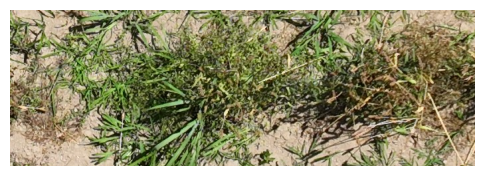

DJI_20240617111826_0117_D [[2551.41871766 2459.91604358]
 [3244.57362048 2450.64642425]
 [3238.24542109 2681.45540052]
 [2546.15802744 2692.29330647]]
/Volumes/HD-PCFSU3-A/ice-wheat/data/RawData/MAVICK3-12M/90D/DJI_202406171112_001_aobayamaWheat/DJI_20240617111826_0117_D.JPG


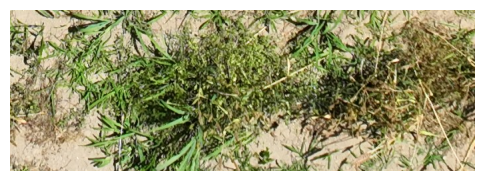

DJI_20240617111822_0115_D [[2567.59185669  968.56392753]
 [3253.95514237  972.12678724]
 [3250.03325107 1199.02142129]
 [2561.12471317 1197.10866905]]
/Volumes/HD-PCFSU3-A/ice-wheat/data/RawData/MAVICK3-12M/90D/DJI_202406171112_001_aobayamaWheat/DJI_20240617111822_0115_D.JPG


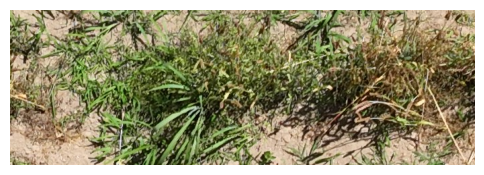

DJI_20240617111950_0159_D [[3998.72565814 2342.55615359]
 [3319.81084146 2338.10234638]
 [3330.73008603 2105.73574595]
 [4009.98868171 2112.86629826]]
/Volumes/HD-PCFSU3-A/ice-wheat/data/RawData/MAVICK3-12M/90D/DJI_202406171112_001_aobayamaWheat/DJI_20240617111950_0159_D.JPG


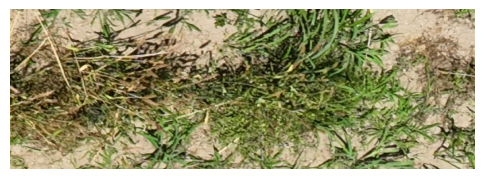

DJI_20240617111948_0158_D [[4042.24799626 1605.99033614]
 [3358.49378708 1592.60706872]
 [3367.54960844 1359.34494832]
 [4049.66433619 1375.56280226]]
/Volumes/HD-PCFSU3-A/ice-wheat/data/RawData/MAVICK3-12M/90D/DJI_202406171112_001_aobayamaWheat/DJI_20240617111948_0158_D.JPG


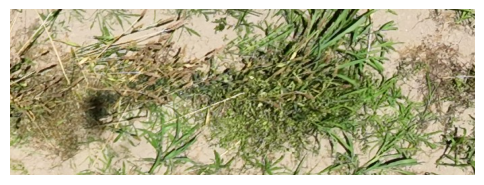

In [176]:
for file, coor in img_dict_sort['95'].items():
    print(file, coor[:4])
    filePath = "/Volumes/HD-PCFSU3-A/ice-wheat/data/RawData/MAVICK3-12M/90D/DJI_202406171112_001_aobayamaWheat/" + file + ".JPG"
    rectangle = np.array(coor[:4])
    print(filePath)
    show_cropped_rectangle(filePath, rectangle)
    x = "/Volumes/HD-PCFSU3-A/ice-wheat/data/RawData/MAVICK3-12M/90D/DJI_202406171112_001_aobayamaWheat/DJI_20240617111644_0066_D.JPG"
    # print(x)
    # image = cv2.imread()
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    